#### # 학습 시 참고한 URL : https://datascienceschool.net

### 1. 다음은 경력과 연봉간의 관계를 조사한 데이터이다. 차후 나오는 문제들에 대한 풀이를 하시오

In [11]:
# 필요한 패키지 임포트
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from patsy import *

In [12]:
# 데이터 로드
df1 = pd.read_csv("http://gattonweb.uky.edu/sheather/book/docs/datasets/profsalary.txt", sep = "\t")
del df1["Case"]
df1.tail()

,Salary,Experience
138,43,3
139,63,12
140,67,16
141,71,20
142,69,31


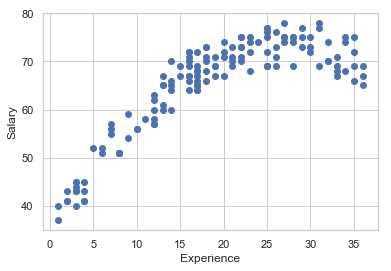

In [13]:
# 데이터 분포 확인
plt.scatter(df1.Experience, df1.Salary)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

### (1) statsmodels를 사용하여 경력에서 연봉을 예측하는 2차 다항회귀모형을 만들어라

In [14]:
sm.OLS.from_formula("Salary ~ Experience + I(Experience**2)", data=df1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     859.3
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           2.43e-79
Time:                        23:17:19   Log-Likelihood:                -349.51
No. Observations:                 143   AIC:                             705.0
Df Residuals:                     140   BIC:                             713.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             34.7205      0.829     41.896      0.000      33.082      36.359
Experience             2.8723      0.096     30.014      0.000       2.683       3.061
I(Experience ** 2)    -0.0533      0.002    -21.526      0.000      -0.058      -0.048
==============================================================================
Omnibus:                       31.087   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.892
Skew:                           0.030   Prob(JB):                       0.0319
Kurtosis:                       1.926   Cond. No.                     2.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (2) 다음 플롯과 같이 스캐터 플롯 위에 모형의 예측값을 나타내는 코드를 완성하라.

In [15]:
result = sm.OLS.from_formula("Salary ~ Experience + I(Experience**2)", data=df1).fit()

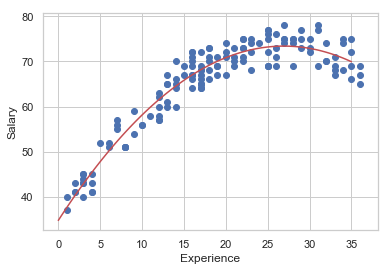

In [16]:
xnew1 = pd.DataFrame(np.linspace(0,35,100),columns=["Experience"])
ypred1 = result.predict(xnew1)
plt.plot(xnew1, ypred1,'r-')
plt.scatter(df1.Experience, df1.Salary)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

### (3) 레버리지가 평균의 3배 이상인 데이터를 찾아서 그림과 같이 스캐터 플롯 위에 표시하여라

In [17]:
influence = result.get_influence()
h = influence.hat_matrix_diag
idx = h > ( 3 * h.mean() )
df1[idx]

,Salary,Experience
21,67,36
40,65,36
46,40,1
60,37,1
65,69,36


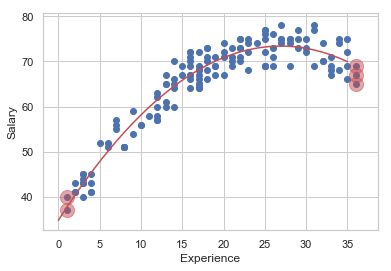

In [20]:
xnew1 = pd.DataFrame(np.linspace(0,35,100),columns=["Experience"])
ypred1 = result.predict(xnew1)
plt.plot(xnew1, ypred1,'r-')
plt.scatter(df1.Experience, df1.Salary)
plt.scatter(df1.Experience[idx], df1[idx].Salary, s=200, c='r', alpha=0.5)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

### 2. 다음은 Defective와 Temperature, Density, Rate 간의 관계를 조사한 데이터이다. 차후 나오는 문제들에 대한 풀이를 하시오

* 종속변수 : Defective

In [22]:
df2 = pd.read_csv("http://gattonweb.uky.edu/sheather/book/docs/datasets/defects.txt", sep = "\t")
del df2["Case"]
df2.tail()

,Temperature,Density,Rate,Defective
25,2.44,23.47,236.0,36.7
26,1.87,26.51,237.3,24.5
27,1.45,30.70,221.0,2.8
28,2.82,22.30,253.2,60.8
29,1.74,28.47,207.9,10.5


### (1) 이 데이터를 이용하여 선형회귀모형을 구하라

In [23]:
result2 = sm.OLS.from_formula("Defective ~ scale(Temperature) + scale(Density) + scale(Rate)", data=df2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Defective   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     63.36
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           4.37e-12
Time:                        23:22:59   Log-Likelihood:                -99.268
No. Observations:                  30   AIC:                             206.5
Df Residuals:                      26   BIC:                             212.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             27.1433      1.298     20.909      0.000      24.475      29.812
scale(Temperature)     9.2224      4.758      1.938      0.063      -0.557      19.002
scale(Density)        -6.0354      4.945     -1.221      0.233     -16.199       4.129
scale(Rate)            2.9899      3.346      0.894      0.380      -3.887       9.867
==============================================================================
Omnibus:                        2.091   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.491
Skew:                           0.545   Prob(JB):                        0.474
Kurtosis:                       2.948   Cond. No.                         8.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (2) 실제 Defective와 이 모형에서 예측한  Defective 간의 비선형 회귀모형을 구하여 실제 데이터와 회귀 결과를 플롯으로 나타내라. 어떤 비선형 함수를 사용해야 하는가

In [24]:
ypred2 = result2.predict(df2)
df3 = df2.copy()
df3["DefectiveHat"] = ypred2

## np.sqrt => 제곱근(루트) 구하는 함수
model3 = sm.OLS.from_formula("DefectiveHat ~ np.sqrt(Defective)",data = df3)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DefectiveHat   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     456.3
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           7.17e-19
Time:                        23:23:35   Log-Likelihood:                -86.351
No. Observations:                  30   AIC:                             176.7
Df Residuals:                      28   BIC:                             179.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -9.8560      1.914     -5.151      0.000     -13.776      -5.936
np.sqrt(Defective)     7.8455      0.367     21.361      0.000       7.093       8.598
==============================================================================
Omnibus:                        0.724   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.600
Skew:                          -0.324   Prob(JB):                        0.741
Kurtosis:                       2.756   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

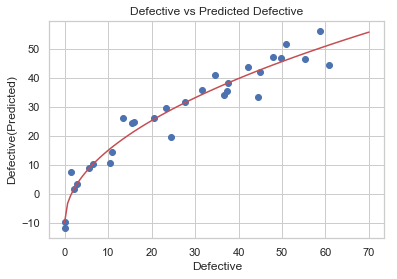

In [25]:
plt.scatter(df3.Defective, df3.DefectiveHat)
xnew3 = pd.DataFrame(np.linspace(0,70,100),columns = ["Defective"])
ypred3 = result3.predict(xnew3)
plt.plot(xnew3, ypred3,'r-')
plt.xlabel("Defective")
plt.ylabel("Defective(Predicted)")
plt.title("Defective vs Predicted Defective")
plt.show()

### (3) 위에서 구한 비선형 변환함수를 사용하여 Defective와 예측된 Defective간의 관계를 나타낼 수 있도록 비선형 회귀모형을 만들고 그림을 그려라

In [26]:
model4 = sm.OLS.from_formula("np.sqrt(Defective) ~ scale(Temperature) + scale(Density) + scale(Rate)",data = df3)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.sqrt(Defective)   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     143.5
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           2.71e-16
Time:                        23:25:52   Log-Likelihood:                -23.438
No. Observations:                  30   AIC:                             54.88
Df Residuals:                      26   BIC:                             60.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.7160      0.104     45.498      0.000       4.503       4.929
scale(Temperature)     0.8978      0.380      2.363      0.026       0.117       1.679
scale(Density)        -0.9633      0.395     -2.440      0.022      -1.775      -0.152
scale(Rate)            0.3304      0.267      1.237      0.227      -0.219       0.879
==============================================================================
Omnibus:                        1.136   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                0.729
Skew:                           0.380   Prob(JB):                        0.695
Kurtosis:                       2.935   Cond. No.                         8.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

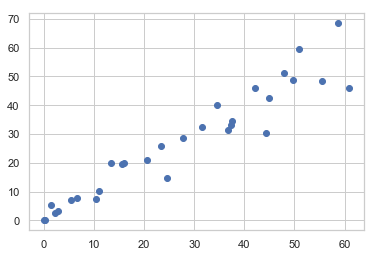

In [27]:
ypred4 = result4.predict(df3)
df4 = df3.copy()
df4["DefectiveHat"] = ypred4 ** 2
plt.scatter(df4.Defective, df4.DefectiveHat)
plt.show()